In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../../")
import os.path
from src.compress_sensing_library import *
from src.utility_library import *

# Package for importing image representation
from PIL import Image, ImageOps

import pandas as pd
import seaborn as sns
import time

In [4]:
img = 'tree_part1.jpg'
img_nm = 'tree_part1'

num_cell_list = [50, 100, 200, 300, 500]
save = False


V1_data = '../../result/dct/{img}/V1/param_Mon_Apr_24_13_00_36_2023.csv'.format(img = img_nm)
pixel_data = '../../result/dct/{img}/pixel/param_Mon_Apr_24_12_27_11_2023.csv'.format(img = img_nm)
gaussian_data = '../../result/dct/{img}/gaussian/param_Mon_Apr_24_12_26_31_2023.csv'.format(img = img_nm)
# V1_data = 'param_Mon_Apr_24_13_00_36_2023.csv'
# pixel_data = 'param_Mon_Apr_24_12_27_11_2023.csv'
# gaussian_data = 'param_Mon_Apr_24_12_26_31_2023.csv'


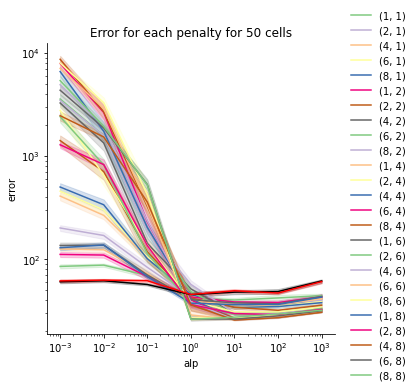

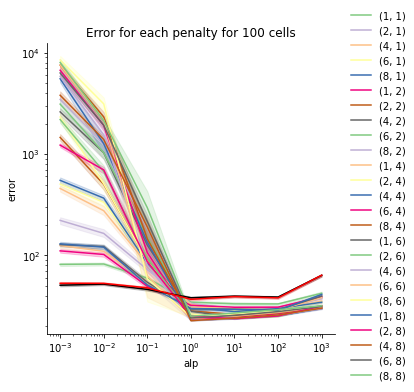

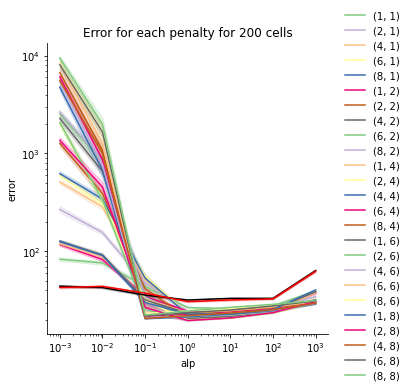

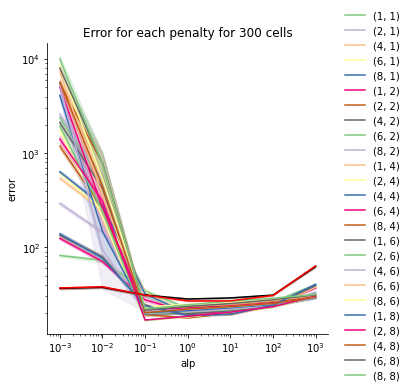

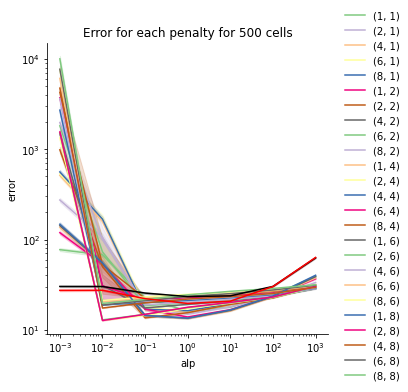

In [360]:
for num_cell in num_cell_list:
    # Work on previously saved data
    V1_param_df = remove_unnamed_data(pd.read_csv(V1_data))
    pixel_param_df = remove_unnamed_data(pd.read_csv(pixel_data))
    gaussian_param_df = remove_unnamed_data(pd.read_csv(gaussian_data))


    # bring only specific number of cell data
    V1_param_df = V1_param_df[V1_param_df['num_cell'] == num_cell]
    pixel_param_df = pixel_param_df[pixel_param_df['num_cell'] == num_cell]
    gaussian_param_df = gaussian_param_df[gaussian_param_df['num_cell'] == num_cell]
#     save_path = os.path.join('./result/{img}/V1/'.format(img = working_img.split('.')[0]))
    
#     fig = sns.relplot(data = V1_param_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
#                       hue = V1_param_df[['sparse_freq', 'cell_sz']].apply(tuple, axis = 1))
#     fig.set(yscale='log')
#     fig.set(xscale='log')
#     fig.set(title='error for each frequency for {cell} number of cell'.format(cell = num_cell))
#     if (save):
#         fig.savefig(os.path.join(save_path, "alpha_error_per_hyperparam_{cell}_num_cell_".
#                                  format(cell = num_cell) + "_".
#                                  join(str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
#     plt.show()


#     save_path = os.path.join('./result/{img}/'.format(img = working_img.split('.')[0]))
    fig = sns.relplot(data = V1_param_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
                      hue = V1_param_df[['sparse_freq', 'cell_size']].apply(tuple, axis = 1), legend = True)

    fig.set(title='Error for each penalty for {cell} cells'.format(cell = num_cell))
    fig.map(sns.lineplot, x = 'alp', y = 'error', data = pixel_param_df, 
            label= 'pixel_error', color = 'black', 
            legend = False)#.add_legend(title='Pixel & Gaussian', loc = 'right')
    fig.map(sns.lineplot, x = 'alp', y = 'error', data = gaussian_param_df, 
            label= 'gaussian_error', color = 'red', 
            legend = False)
    fig.set(yscale='log')
    fig.set(xscale='log')
#     plt.legend(title = 'V1')
    # plt.legend(title = 'pixel', label = ['classic'])

    if (save):
        fig.savefig(os.path.join(save_path, "Error_for_each_penalty_{cell}_num_cell_".
                                 format(cell = num_cell) + "_".
                                 join(str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
    plt.show()


#     save_path = os.path.join('./result/{img}/pixel/'.format(img = working_img.split('.')[0]))

#     pixel_fig = sns.relplot(data = pixel_param_df, x = 'alpha', y = 'error', kind= 'line')
#     pixel_fig.set(yscale='log')
#     pixel_fig.set(xscale='log')
#     plt.title('pixel: Error for each penalty {cell} cells'.format(cell = num_cell))

#     if (save):
#         pixel_fig.savefig(os.path.join(save_path, "Error_for_each_penalty_" + "_".join(
#             str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
#     plt.show()

In [441]:
num_cell = 50
pixel_df = remove_unnamed_data(pd.read_csv(pixel_data))
gaussian_df = remove_unnamed_data(pd.read_csv(gaussian_data))
V1_df = remove_unnamed_data(pd.read_csv(V1_data))

In [414]:

pixel_param_df = pixel_param_df[pixel_param_df['num_cell'] == num_cell]
pixel_param_df

,rep,alp,num_cell,error
0,0,0.001,50,65.186220
5,0,0.010,50,71.380480
10,0,0.100,50,52.868393
15,0,1.000,50,39.015665
20,0,10.000,50,49.399201
...,...,...,...,...
675,19,0.100,50,59.848959
680,19,1.000,50,65.155955
685,19,10.000,50,51.694572
690,19,100.000,50,44.924210


In [70]:
V1_param_df

,rep,alp,num_cell,cell_size,sparse_freq,error
50,0,0.001,200,1,1,97.110495
51,0,0.001,200,1,2,267.545128
52,0,0.001,200,1,4,401.441712
53,0,0.001,200,1,6,561.642904
54,0,0.001,200,1,8,645.069475
...,...,...,...,...,...,...
17445,19,1000.000,200,8,1,42.750334
17446,19,1000.000,200,8,2,31.478733
17447,19,1000.000,200,8,4,29.740761
17448,19,1000.000,200,8,6,31.179269


In [382]:
V1_df_mean = V1_df.groupby(list(V1_df.columns[1:-1]), 
                                           as_index = False).mean().drop('rep', axis=1)
V1_df_mean.loc[V1_df_mean['error'] == V1_df_mean['error'].
                                                median()][['num_cell', 'cell_size', 'sparse_freq']].values.squeeze()

array([100,   2,   1])

In [385]:
num = 100
V1_df.loc[V1_df["num_cell"] == num]

,rep,alp,num_cell,cell_size,sparse_freq,error
25,0,0.001,100,1,1,77.090701
26,0,0.001,100,1,2,199.032015
27,0,0.001,100,1,4,423.743006
28,0,0.001,100,1,6,541.045674
29,0,0.001,100,1,8,586.561908
...,...,...,...,...,...,...
17420,19,1000.000,100,8,1,41.346301
17421,19,1000.000,100,8,2,31.973172
17422,19,1000.000,100,8,4,29.458737
17423,19,1000.000,100,8,6,31.666451


In [439]:
gaussian_param_df['num_cell'].unique().shape

(1,)

In [430]:
V1_df['num_cell'].unique().shape == gaussian_param_df['num_cell'].unique().shape

False

In [443]:
not (V1_df['num_cell'].unique().shape == pixel_df['num_cell'].unique().shape) and (V1_df['num_cell'].unique().shape == gaussian_df['num_cell'].unique().shape)

False

In [10]:
def alpha_error(img, method, pixel_data, gaussian_data, V1_data, save = False):
    if None in [pixel_data, gaussian_data, V1_data]:
        print("Currently all file required")
        sys.exit(0)
    
    title = ''
    
    # Preprocess data not to have 
    pixel_df = remove_unnamed_data(pd.read_csv(pixel_data))
    gaussian_df = remove_unnamed_data(pd.read_csv(gaussian_data))
    V1_df = remove_unnamed_data(pd.read_csv(V1_data))
    
    num_cell_list = V1_df['num_cell'].unique()
    
    for num_cell in num_cell_list :
        # In order to bring fixed cell_size and sparse_frequency, bring parameter that has median error value
        V1_df_mean = V1_df.loc[V1_df["num_cell"] == num_cell].groupby(list(V1_df.columns[1:-1]), 
                                               as_index = False).mean().drop('rep', axis=1)
        median_col = V1_df_mean.loc[V1_df_mean['error'] == V1_df_mean['error'].median()]

        # Depending on the basis used (dct / dwt) add lv parameter
        if (method.lower() == 'dct') :
            cell_size, sparse_freq = V1_df_mean.loc[V1_df_mean['error'] == V1_df_mean['error'].
                                                    median()][['cell_size', 'sparse_freq']].values.squeeze()
            V1_df_mod = V1_df.loc[(V1_df['cell_size'] == cell_size) & 
                                  (V1_df['sparse_freq'] == sparse_freq)]
            title=r"$\alpha$_Error for {cell} cells (cell_size: {cell_size}, sparse_freq: {sparse_freq})".format(
                cell = num_cell, cell_size = cell_size, sparse_freq = sparse_freq)
        else :
            cell_size, sparse_freq, lv = V1_df_mean.loc[V1_df_mean['error'] == V1_df_mean['error'].
                                                    median()][['cell_size', 'sparse_freq', 'lv']].values.squeeze()
            V1_df_mod = V1_df.loc[(V1_df['cell_size'] == cell_size) & 
                                  (V1_df['sparse_freq'] == sparse_freq) & 
                                  (V1_df['lv'] == lv)]
            title=r"$\alpha$_Error for {cell} cells \
            (cell_size: {cell_size}, sparse_freq: {sparse_freq}, lv: {lv})".format(
                cell = num_cell, cell_size = cell_size, sparse_freq = sparse_freq, lv = lv)

        fig = sns.relplot(data = V1_df_mod, x = 'alp', y = 'error', kind='line', palette='Accent', 
                          legend = True, label = 'V1')


        fig.map(sns.lineplot, x = 'alp', y = 'error', data = pixel_df.loc[pixel_df["num_cell"] == num_cell], 
                label= 'pixel', color = 'red', 
                legend = True)
        fig.map(sns.lineplot, x = 'alp', y = 'error', data = gaussian_df.loc[gaussian_df["num_cell"] == num_cell], 
                label= 'gaussian', color = 'green', 
                legend = True)
        fig.set(title = title)
        fig.add_legend(title='Observation', loc = 'right')
        fig.set(xscale='log')
        fig.set(yscale='log')
        plt.xlabel(r"$\alpha$")
        
        # Save the figure
        if save :
            save
            path = fig_save_path(img, method, 'combined', title)
            plt.savefig(path, dpi = 200)
        plt.show()

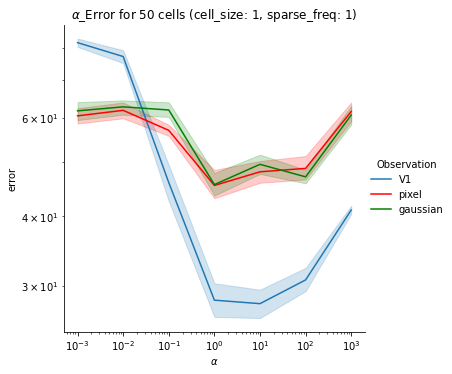

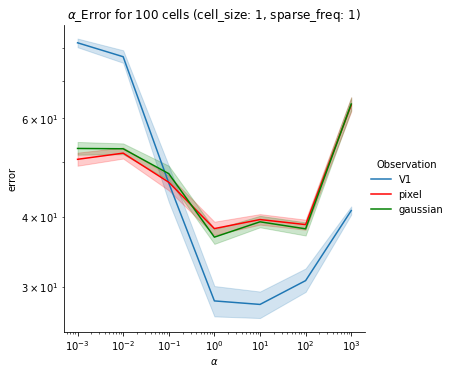

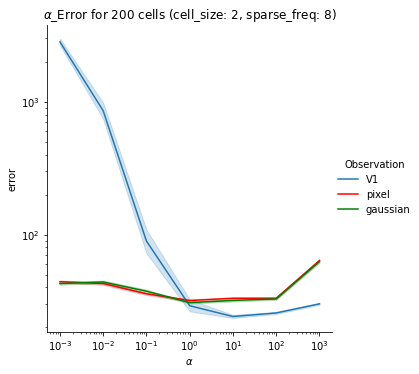

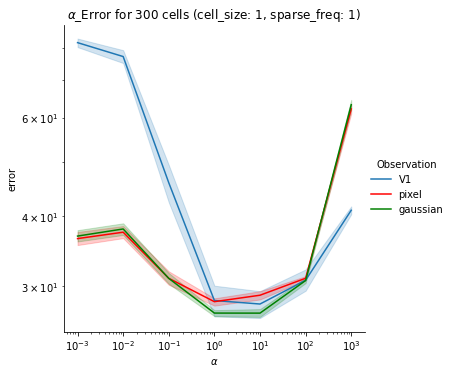

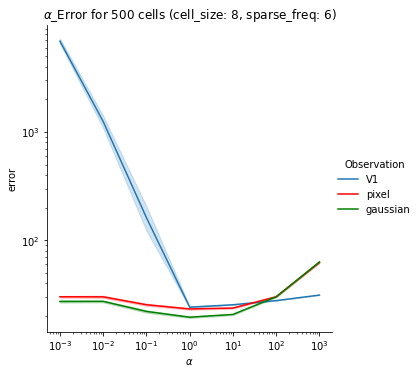

In [11]:
alpha_error('tree_part1.jpg', 'dct', pixel_data, gaussian_data, V1_data, True)

In [269]:
V1_df.loc[(V1_df['cell_size'] == cell_size) & (V1_df['sparse_freq'] == sparse_freq)]

,rep,alp,num_cell,cell_size,sparse_freq,error
59,0,0.001,200,2,8,2309.754965
184,0,0.010,200,2,8,1213.669182
309,0,0.100,200,2,8,21.910161
434,0,1.000,200,2,8,22.757511
559,0,10.000,200,2,8,22.318199
...,...,...,...,...,...,...
16934,19,0.100,200,2,8,46.481438
17059,19,1.000,200,2,8,20.848481
17184,19,10.000,200,2,8,21.926317
17309,19,100.000,200,2,8,24.594591


In [252]:
list(V1_param_df.columns[1:-1])

['alp', 'num_cell', 'cell_size', 'sparse_freq']

In [254]:
V1_param_df_mean = V1_param_df.groupby(list(V1_param_df.columns[1:-1]), as_index = False).mean().drop('rep', axis=1)
V1_param_df_mean

,alp,num_cell,cell_size,sparse_freq,error
0,0.001,200,1,1,83.255814
1,0.001,200,1,2,268.247096
2,0.001,200,1,4,509.891351
3,0.001,200,1,6,595.556115
4,0.001,200,1,8,621.617116
...,...,...,...,...,...
170,1000.000,200,8,1,40.415118
171,1000.000,200,8,2,30.772934
172,1000.000,200,8,4,29.559472
173,1000.000,200,8,6,31.227252


In [185]:
V1_param_df_mean['error'].mean()

565.8289680293315

In [242]:
V1_param_df_mean = V1_param_df.groupby('alp	num_cell	cell_size	sparse_freq'.split('\t'), as_index = False).mean().drop('rep', axis=1)
V1_param_df_mean

,alp,num_cell,cell_size,sparse_freq,error
0,0.001,200,1,1,83.255814
1,0.001,200,1,2,268.247096
2,0.001,200,1,4,509.891351
3,0.001,200,1,6,595.556115
4,0.001,200,1,8,621.617116
...,...,...,...,...,...
170,1000.000,200,8,1,40.415118
171,1000.000,200,8,2,30.772934
172,1000.000,200,8,4,29.559472
173,1000.000,200,8,6,31.227252


In [182]:
V1_param_df.iloc[(V1_param_df['error'] - V1_param_df['error'].median()).abs().argsort()][:1]

,rep,alp,num_cell,cell_size,sparse_freq,error
5182,5,1000.0,200,2,4,28.620810
16060,18,0.1,200,4,1,28.632905
12925,14,100.0,200,1,1,28.634627
6937,7,1000.0,200,4,4,28.646472
699,0,100.0,200,8,8,28.599801
7807,8,1000.0,200,2,4,28.681774
9449,10,100.0,200,8,8,28.565658
13824,15,100.0,200,8,8,28.700156
12074,13,100.0,200,8,8,28.707610
1683,1,1000.0,200,2,6,28.709155


In [181]:
img_arr = process_image('tree_part1.jpg', 'black')
reconst = filter_reconstruct(img_arr, alpha = 1000, num_cell = 200, cell_size = 2, 
                   sparse_freq = 4, observation = "V1")
error_calculation(img_arr, reconst)

28.513583507592386

In [243]:
V1_param_df_mean.iloc[(V1_param_df_mean['error'] - V1_param_df_mean['error'])]

,alp,num_cell,cell_size,sparse_freq,error
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
...,...,...,...,...,...
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814


In [267]:
cell_size

2

In [255]:
V1_param_df_mean.sort_values('error').median()[['cell_size', 'sparse_freq']]

cell_size      4.0
sparse_freq    4.0
dtype: float64

In [247]:
V1_param_df_mean.loc[V1_param_df_mean['num_cell'] == 200 & 
                     V1_param_df_mean["cell_size"] == 2 & 
                     V1_param_df_mean["sparse_freq"]== 8]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [230]:
V1_param_df_mean.columns

Index(['error'], dtype='object')

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


56.790247597824596

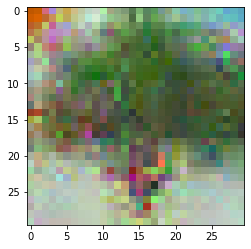

In [87]:
img_arr = process_image('tree_part1.jpg', '-c')

reconst = filter_reconstruct(img_arr,
    300,
    cell_size=None,
    sparse_freq=None,
    filter_dim=(30, 30),
    alpha=None,
    method='dwt',
    observation='pixel',
    lv=4,
    dwt_type='db2',
    rand_weight=False,
    mode='color',
)
plt.imshow(reconst)
error_calculation(img_arr, reconst)

In [88]:
from pywt import dwtn_max_level

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


51.23492732285055


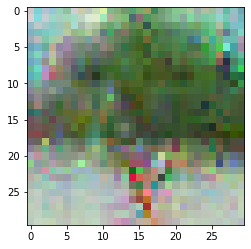

91.16113938150035


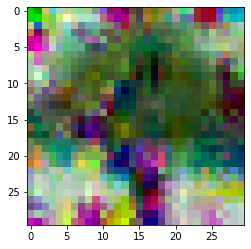

In [140]:
img_arr = process_image('tree_part1.jpg', '-c')
lv = dwtn_max_level(img_arr.shape, 'db2', [0, 1]) -1 
reconst = filter_reconstruct(img_arr,
    300,
    cell_size=None,
    sparse_freq=None,
    filter_dim=(30, 30),
    alpha=None,
    method='dwt',
    observation='pixel',
    lv=4,
    dwt_type='db2',
    rand_weight=False,
    mode='color',
)
plt.imshow(reconst)
print(error_calculation(img_arr, reconst))
plt.show()

optLV_reconst = filter_reconstruct(img_arr,
    300,
    cell_size=None,
    sparse_freq=None,
    filter_dim=(30, 30),
    alpha=None,
    method='dwt',
    observation='pixel',
    lv=lv,
    dwt_type='db2',
    rand_weight=False,
    mode='color',
)
plt.imshow(optLV_reconst)
print(error_calculation(img_arr, optLV_reconst))
plt.show()

In [101]:
dwtn_max_level(img_arr.shape, 'db2')

3